## Chapter 10 - Working With Data

Now focus is on Exploring Data.

A good first step is to explore the data by computing a few summary statistics, such as the min, max, mean, median and the standard deviation. These can be useful, but it is more powerful to create a histogram to obsserve how the data is distributed over discrete buckets


In [24]:
from helpers import Vector
from collections import Counter

import math

import matplotlib.pyplot as plt

def bucketsize(point: float, bucket_size: float) -> float:
    """Floor the point to the next lower multiple of bucket_size"""
    return  bucket_size*math.floor(point/bucket_size)

def make_histogram(points: Vector, bucket_size: float) -> Dict[float, int]:
    """ Buckets the points annd counts how mnay in each bucket """
    return Counter(bucketsize(point, bucket_size) for point in points)

def plot_histogram(points: Vector, bucket_size:float, title: str =""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)


normally distributed values [50.76301574707031, 18.964920043945312, 21.817703247070312, -78.38630676269531, 9.093246459960938, 33.36799621582031, -73.95057678222656, -59.80842590332031, -47.64930725097656, -39.27360534667969]


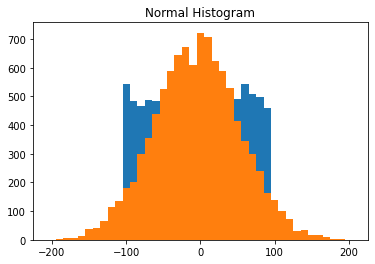

In [28]:
import random
from helpers import inverse_normal_cdf

random.seed(0)
uniform = [200*random.random()-100 for _ in range(10000)]

normal = [57*inverse_normal_cdf(random.random()) for _ in range(10000)]

print(f'normally distributed values {normal[:10]}')

plot_histogram(uniform, 10, "Uniform Histogram")

plot_histogram(normal, 10, "Normal Histogram")

From the above we can see just how different these distributions are, even though their means and standard deviations are both close to 0 and 58, respectively. That is why it is useful to explore other elements of the data to gain more of an understanding.

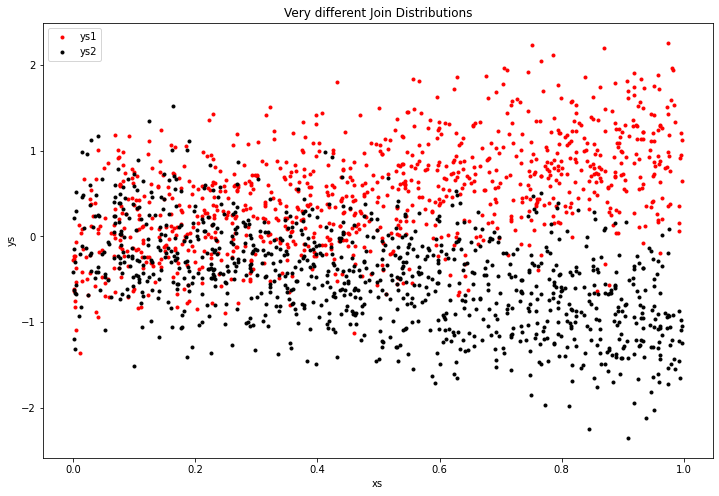

In [57]:
import matplotlib.pyplot as plt
def random_normal()-> float:
    """returns a random draw from a standard normla distribution"""
    return inverse_normal_cdf(random.random())

xs = [random.random() for _ in range(1000)]
ys1 = [x + random_normal()/2 for x in xs]
ys2 = [-x + random_normal()/2 for x in xs]

fig, ax = plt.subplots(figsize=(12,8))
    
ax.scatter(xs,ys1, marker=".", color="red", label="ys1")
ax.scatter(xs,ys2, marker=".", color="black", label="ys2")
ax.set_xlabel("xs")
ax.set_ylabel("ys")
ax.legend(loc="upper left")
ax.set_title("Very different Join Distributions")
plt.show()


